In [1]:
# data manupulation and modelling
import pandas as pd
import numpy as np
from scipy.stats import norm

#visualization
import matplotlib 
import matplotlib.pyplot as plt
# plot settings
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize']=[12.0, 8.0]
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['lines.linewidth'] = 2.0

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

## load data

In [3]:
# load the csv file , dayfirst=True to indicate dd-mm
nasdaq = pd.read_csv('data/Nasdaq.csv', index_col=0, parse_dates=True, dayfirst=True)[:'2021']
nasdaq

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0
...,...,...,...,...,...,...
2021-12-27,15696.830080,15871.400390,15696.830080,15871.259770,15871.259770,3730120000
2021-12-28,15895.200200,15901.469730,15757.070310,15781.719730,15781.719730,3623600000
2021-12-29,15794.919920,15821.809570,15679.849610,15766.219730,15766.219730,3694500000


In [4]:
# verify the datetime format 
nasdaq.index

DatetimeIndex(['1971-02-05', '1971-02-08', '1971-02-09', '1971-02-10',
               '1971-02-11', '1971-02-12', '1971-02-16', '1971-02-17',
               '1971-02-18', '1971-02-19',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=12840, freq=None)

In [5]:
# get last 300 index values
nasdaq.index[-300:] # some are mm-dd while others are dd-mm, therefore add dayfirst=True at start

DatetimeIndex(['2020-10-23', '2020-10-26', '2020-10-27', '2020-10-28',
               '2020-10-29', '2020-10-30', '2020-11-02', '2020-11-03',
               '2020-11-04', '2020-11-05',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=300, freq=None)

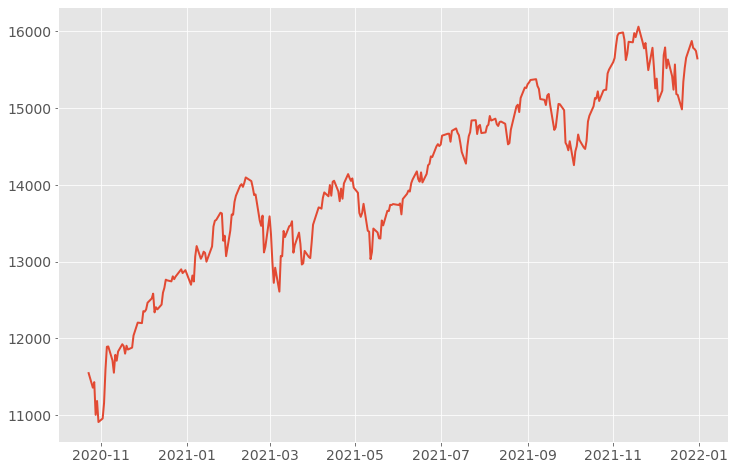

In [6]:
# get values from 1971 to 2021
plt.plot(nasdaq['Adj Close'][-300:])

## normal dist

In [7]:
# calucate returns and add it to existing dataframe
nasdaq['Return'] = nasdaq['Adj Close'].pct_change().fillna(0)
nasdaq['Return'].head()

Date
1971-02-05    0.000000
1971-02-08    0.008400
1971-02-09   -0.000793
1971-02-10   -0.000695
1971-02-11    0.007548
Name: Return, dtype: float64

In [8]:
# calculate mean and sigma
mu = np.mean(nasdaq['Return'])
sigma = np.std(nasdaq['Return'])

In [9]:
# calculate the scaled return
nasdaq['Scaled_Return'] = nasdaq['Return'].apply(lambda x: (x-mu)/sigma)
nasdaq.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Scaled_Return
Date,,,,,,,,
1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,0.000000,-0.037758
1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,0.008400,0.634494
1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,-0.000793,-0.101245
1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,-0.000695,-0.093357
1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0,0.007548,0.566300


In [10]:
# calculate bin range
# calculate scaled min and max
sr_min = np.min(nasdaq['Scaled_Return'])
sr_max = np.max(nasdaq['Scaled_Return'])

sr_min, sr_max

(-9.898566911387583, 11.305104732183308)

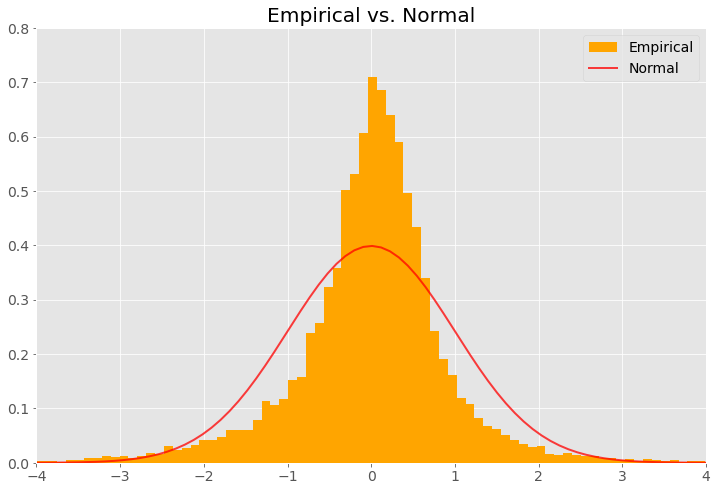

In [11]:
# calculate normal prob density function
x = np.linspace(sr_min, sr_max, 200)
# norm pdf, can use y = norm.pdf(x,0,1)
y = (1/np.sqrt(2*np.pi)*np.exp(-0.5*x**2))
# plot histogram of scaled returns
plt.hist(nasdaq['Scaled_Return'], bins=200, density=True, label = 'Empirical', color='orange', alpha=1)
# plot norm pdf
plt.plot(x, y, label="Normal", color='red', alpha=0.75)
# set x and y axis limits
plt.xlim(-4,4)
plt.ylim(0,0.8)
# set title
plt.title('Empirical vs. Normal')
#set lengends
plt.legend()

plt.show()

## binomial tree

In [12]:
# import plotting function from helper.py
from helper import plot_asset_path, plot_probability, plot_binomial_tree
# risk neutral probability: each hare price today is the discounted expectations of the share price (u/v=1+/-sigma*sqrt(dt))

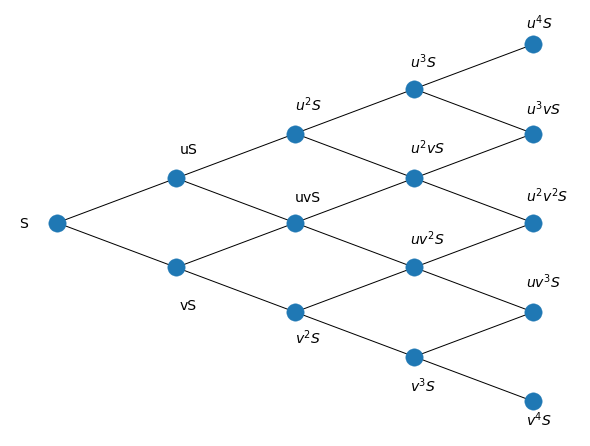

In [13]:
# plot asset price path
plot_asset_path()

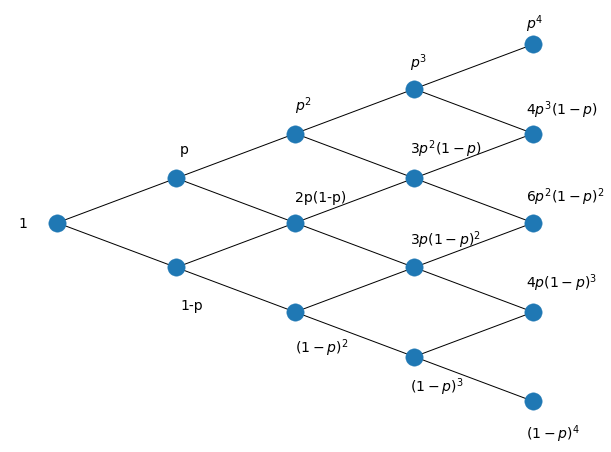

In [14]:
plot_probability()

In [15]:
def binomial_option(spot, strike, rate, sigma, time, steps, output=0):
    # discription for the function
    '''
    Function for building binomial option tree for european call option payoff
    
    Parameters
    ----------
    spot ------- int or float ---- spot price
    strike ----- int of float ---- strike price
    rate ------- float ----------- interest rate
    sigma ------ float ----------- volatiity of underlying stock
    steps ------ int ------------- number of time steps
    output ----- int ------------- [0: price, 1: payoff, 2: option value, 3: option delta]
        
    Returns
    -------
    output ----- narray ----------- an array object of price, payoff, option value and deltas as specified by the output para
        
    '''
    # define parameters
    dt = time/steps                         # dt is time step
    u = 1 + sigma*np.sqrt(dt)               # u is up factor
    v = 1 - sigma*np.sqrt(dt)               # v is down factor
    p = 0.5 + rate*np.sqrt(dt)/(2*sigma)    # p is the risk neutral prob
    df = 1 / (1+rate*dt)                    # df is discount factor
    
    # initialize arrays
    px = np.zeros((steps+1, steps+1))       # asset price path starts with zero matrix
    cp = np.zeros((steps+1, steps+1))       # call intrinsic payoff
    V = np.zeros((steps+1, steps+1))        # option value
    d = np.zeros((steps+1, steps+1))        # option delta
    
    # binomial loop - forward loop
    for j in range(steps+1):
        for i in range(j+1):
            px[i,j] = spot * np.power(v, i) *np.power(u, j-i)
            cp[i,j] = np.maximum(px[i,j]-strike,0)
    
    # reverse loop
    for j in range(steps+1, 0, -1):
        for i in range(j):
            if (j==steps+1):
                V[i,j-1] = cp[i,j-1]     # terminal payoff
                d[i,j-1] = 0             # termnal delta
            else:
                V[i,j-1] = p*V[i,j]+(1-p)*V[i+1,j]
                d[i,j-1] = (V[i,j]-V[i+1,j])/(px[i,j]-px[i+1,j])
    
    results = np.around(px,2), np.around(cp,2), np.around(V,2), np.around(d,4)
    
    return results[output]

In [16]:
# asset price: binomial_option(spot, strike, rate, sigma, time, steps, output=0)
px = binomial_option(100,100,0.05,0.2,1,4,output=0)
px

array([[100.  , 110.  , 121.  , 133.1 , 146.41],
       [  0.  ,  90.  ,  99.  , 108.9 , 119.79],
       [  0.  ,   0.  ,  81.  ,  89.1 ,  98.01],
       [  0.  ,   0.  ,   0.  ,  72.9 ,  80.19],
       [  0.  ,   0.  ,   0.  ,   0.  ,  65.61]])

In [17]:
# intrinsic value of call option: [0: price, 1: payoff, 2: option value, 3: option delta]
cp = binomial_option(100,100,0.05,0.2,1,4,output=1)
cp

array([[ 0.  , 10.  , 21.  , 33.1 , 46.41],
       [ 0.  ,  0.  ,  0.  ,  8.9 , 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [18]:
# option price
opx = binomial_option(100,100,0.05,0.2,1,4,output=2)
opx

array([[10.81, 16.48, 24.42, 34.76, 46.41],
       [ 0.  ,  3.52,  6.26, 11.13, 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [19]:
# Option delta
delta = binomial_option(100,100,0.05,0.2,1,4,3)
delta

array([[0.6478, 0.8256, 0.9765, 1.    , 0.    ],
       [0.    , 0.3479, 0.5622, 0.9086, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ]])

In [20]:
# Binomial Option Price
print(f"European Call Option Price using Binomial Tree Method: {opx[0,0]:.2f}")

European Call Option Price using Binomial Tree Method: 10.81


## visualize the binomial tree

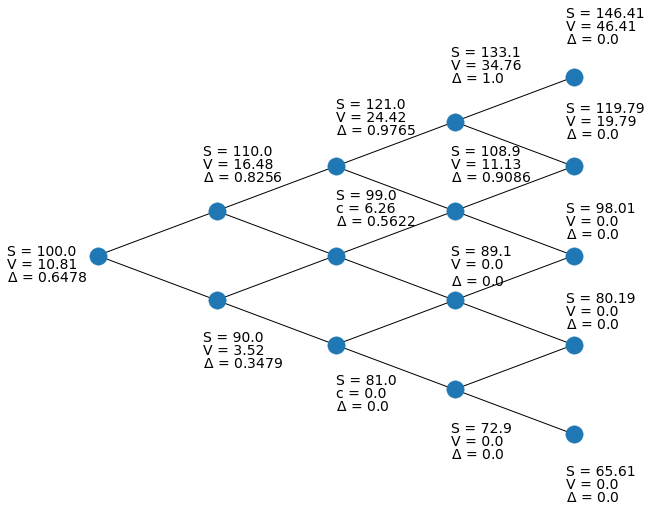

In [21]:
# plot a 4-step bionomial tree
plot_binomial_tree(px[0,0], px, opx,delta)